# On codera la lecture d'ARN

In [32]:
import random
import numpy as np

%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

RuntimeError: 'widget' is not a recognised GUI loop or backend name

In [2]:
DEBUT_LECTURE = "ATG"
STOPS = ["TAA", "TAG", "TGA"]

acide_amine = {
    "TTT" : "Phe",
    "TTC" : "Phe",

    "TTA" : "Leu",
    "TTG" : "Leu",
    "CTT" : "Leu",
    "CTC" : "Leu",
    "CTA" : "Leu",
    "CTG" : "Leu",

    "ATT" : "Ile",
    "ATC" : "Ile",
    "ATA" : "Ile",

    "ATG" : "Met",

    "GTT" : "Val",
    "GTC" : "Val",
    "GTA" : "Val",
    "GTG" : "Val",

    "TCT" : "Ser",
    "TCC" : "Ser",
    "TCA" : "Ser",
    "TCG" : "Ser",

    "CCT" : "Pro",
    "CCC" : "Pro",
    "CCG" : "Pro",
    "CCA" : "Pro",

    "ACT" : "Thr",
    "ACA" : "Thr",
    "ACG" : "Thr",
    "ACC" : "Thr",

    "GCT" : "Ala",
    "GCA" : "Ala",
    "GCC" : "Ala",
    "GCG" : "Ala",

    "TAT" : "Tyr",
    "TAC" : "Tyr",

    "CAT" : "His",
    "CAC" : "His",

    "CAA" : "Gln",
    "CAG" : "Gln",

    "AAT" : "Asn",
    "AAC" : "Asn",

    "AAA" : "Lys",
    "AAG" : "Lys",

    "GAT" : "Asp",
    "GAC" : "Asp",

    "GAA" : "Glu",
    "GAG" : "Glu",

    "TGT" : "Cys",
    "TGC" : "Cys",

    "TGG" : "Trp",

    "CGT" : "Arg",
    "CGA" : "Arg",
    "CGC" : "Arg",
    "CGG" : "Arg",
    "AGA" : "Arg",
    "AGG" : "Arg",

    "AGT" : "Ser",
    "AGC" : "Ser",

    "GGT" : "Gly",
    "GGC" : "Gly",
    "GGA" : "Gly",
    "GGG" : "Gly"

}


In [3]:
# Trouver le début de la séquence
def find_start(arn):
    if arn[0:3] == DEBUT_LECTURE:
        return arn[3:]
    return find_start(arn[1:])

# Supprimer les lettres à la fin de l'ARN qui ne servent pas au calcul
def delete_end(arn):
    if arn == "":
        return ""
    if arn[0:3] in STOPS:
        return ""
    return arn[0:3] + delete_end(arn[3:])

# ça retourne juste la séquence codante
def get_coding_sequence(arn):
    arn = find_start(arn)
    return delete_end(arn)


# Lire la séquence après avoir enlevé les éléments qu'on lit pas
def read_sequence(arn):
    if len(arn) <= 2 or arn[0:3] in STOPS:
        return ""
    return (acide_amine[arn[0:3]] + "-" + read_sequence(arn[3:]))

def compare_two_sequences(arn1, arn2):
    element1 = read_sequence(arn1)
    element2 = read_sequence(arn2)

    element1 = element1.split("-")
    element2 = element2.split("-")

    min_length = min(len(element1), len(element2))
    equal = 0

    for i in range(0, min_length):
        if element1[i] == element2[i]:
            equal = equal + 1

    return equal


In [4]:
# On lit notre ARN
def read_arn(arn):
    return read_sequence(find_start(arn))

In [5]:
ADN = "ATGTTAGAAATTTCATGGTGCCTTA"

print(read_arn(ADN))

Leu-Glu-Ile-Ser-Trp-Cys-Leu-


In [6]:
def generate_letter():
    return random.choice(["A", "T", "G", "C"])

def generate_sequence(length=-1):
    if length == -1:
        length = random.choice(range(50, 80))
    s = ""
    for i in range(0, length):
        s = s+generate_letter()
    return s

In [19]:
def changement(arn, PROB_M=5, PROB_D=5, PROB_A=5):
    p = random.choice(range(0, 100))
    if p < PROB_M:
        arn = generate_letter()

    p = random.choice(range(0, 100))
    if p < PROB_A:
        arn = arn + generate_letter()

    p = random.choice(range(0,100))
    if p < PROB_D:
        arn = arn[1:]

    return arn

In [20]:
def sequence_changement(arn, proba_mut, proba_delete, proba_addition):
    if arn == "":
        return ''
    return changement(arn[0:1], proba_mut, proba_delete, proba_addition) + sequence_changement(arn[1:], proba_mut, proba_delete, proba_addition)

In [12]:
def comparer_deux_chaines_ADN(ch1, ch2):
    ch_max = ""
    ch_min = ""
    if len(ch1) < len(ch2):
        ch_max = ch2
        ch_min = ch1
    else:
        ch_max = ch1
        ch_min = ch2

    n = len(ch_max) - len(ch_min)
    max_output = 0
    for k in range(0, n+1):
        max_output = max(max_output, int(np.sum([np.char.equal(ch_min, ch_max[k:k+len(ch_min)]) == True])))

    return max_output



In [21]:
CONST_POPULATION = 100

def meilleur_personne(proba_mut=5, proba_delete=5, proba_addition=5):
    result =  []
    generated_adn = generate_sequence()
    g_adn = generated_adn
    print("ADN généré au départ :", generated_adn)
    find = False
    loop = 0
    while not find:
        pop_sequences = [""]*CONST_POPULATION
        occurences = [None]*CONST_POPULATION
        for i in range(0, CONST_POPULATION):
            pop_sequences[i] = sequence_changement(generated_adn, proba_mut, proba_delete, proba_addition)
            occurences[i] = compare_two_sequences(ADN, pop_sequences[i])
        max_index = occurences.index(max(occurences))
        result.append(pop_sequences[max_index])
        generated_adn = pop_sequences[max_index]

        if read_sequence(ADN) == read_sequence(generated_adn):
            find = True
        loop = loop + 1

    return g_adn, result, loop




proba_mut = 3 , proba_delete = 1  proba_add = 1
Nombre de générations : 221
ADN généré au départ : GGACTGAGTAGTTTTGGTCGCTATGATTAGCCTTCCCAACGTGTTAACGGTTACGAGGCGCGATCTTAGAAC
proba_mut = 3 , proba_delete = 1  proba_add = 2
Nombre de générations : 176
ADN généré au départ : TTATGTCGAGGGGAAACTATGACGGGGGACGATTCTCTGCCACTCAGTGCAAGTACGTCTA
proba_mut = 3 , proba_delete = 1  proba_add = 3
Nombre de générations : 196
ADN généré au départ : TCCATGCTCCGCCTTGACCGTTGCAAAGAATAACTGAAGAGCGACGACCGCGGGGGTGAAACTAGG
proba_mut = 4 , proba_delete = 1  proba_add = 1
Nombre de générations : 173
ADN généré au départ : ATGAAGTTTTCCGGGTTGGGAGTGATGAGTCTGCATGTAAGACGCCCTTAAAGGCTCTTTAGA
proba_mut = 4 , proba_delete = 1  proba_add = 2
Nombre de générations : 226
ADN généré au départ : AGGCATTAAGGCATATTGGGCTGTATCTCACGGCGCAACCACCCAGATAGTTCAAAGCAAAAGATGACTACCAACTA
proba_mut = 4 , proba_delete = 1  proba_add = 3
Nombre de générations : 40
ADN généré au départ : ACTTGAGTCATGATCGGACTGAGATCATTGAAGTTCTTGGCTACTTTTAGGGAGTCCAACGTT

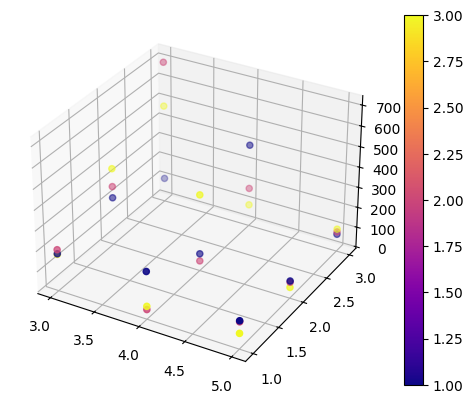

ADN généré au départ : GAGAGTAACCGTGCTGGGGGAACTATTCGTATTGCCTTAATCTCGAGCACCAGACCCC
91


In [26]:
PROBA_MIN = 3
PROBA_MAX = 5
proba_mut = range(PROBA_MIN, PROBA_MAX+1)
proba_del = range(1, 4)
proba_add = range(1, 4)

mutation, deletion, addition = np.meshgrid(proba_mut, proba_del, proba_add)

generations = []

for i in range(len(proba_mut)):
    first_loop = []
    for j in range(len(proba_del)):
        second_loop = []
        for k in range(len(proba_add)):
            print("proba_mut =", mutation[i, j, k], ", proba_delete =", deletion[i, j, k], " proba_add =", addition[i, j, k])
            print("Nombre de générations :", loop)
            ADN_depart, result, loop = meilleur_personne(proba_mut = mutation[i, j, k], proba_delete = deletion[i, j, k], proba_addition = addition[i, j, k])
            second_loop.append(loop)
        first_loop.append(second_loop)
    generations.append(first_loop)



generations = np.array(generations)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(mutation, deletion, generations, c=addition, cmap=plt.plasma())
fig.colorbar(img)
plt.show()

ADN_depart, result, loop = meilleur_personne(proba_mut = 5, proba_delete = 3, proba_addition = 4)

print(loop)


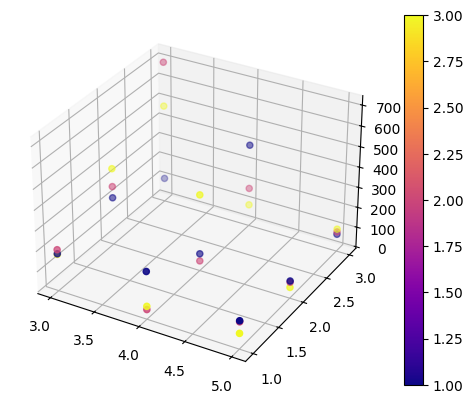

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(mutation, deletion, generations, c=addition, cmap=plt.plasma())
fig.colorbar(img)
plt.show()

In [ ]:
print("ça pris", loop, "pour arriver à notre ADN")
print("ADN qu'on veut avoir:", ADN)
print("ADN de départ généré", ADN_depart)
print("ADN de la dernière génération qui a atteint notre objectif:", result[-1])
print(read_arn(ADN), read_arn(result[-1]))
print("Codant de mon ADN objectif:", get_coding_sequence(ADN))
print("Codant de mon ADN de dernière génération :", get_coding_sequence(result[-1]))

In [ ]:
def moran_v1():
    alpha=50
    Poids=np.exp(-alpha*np.arange(CONST_POPULATION, 0, -1))
    Probas=Poids/np.sum(Poids)

    result =  []
    generated_adn = generate_sequence()
    g_adn = generated_adn
    print("ADN généré au départ :", generated_adn)
    find = False
    loop = 0
    pop_sequences = [""]*CONST_POPULATION
    occurences = [None]*CONST_POPULATION

    while not find:
        for i in range(0, CONST_POPULATION):
            if pop_sequences[i] == "":
                pop_sequences[i] = sequence_changement(generated_adn)
            else:
                pop_sequences[i] = sequence_changement(pop_sequences[i])

            occurences[i] = compare_two_sequences(ADN, pop_sequences[i])

        population_triee = [val for _, val in sorted(zip(occurences, pop_sequences))]
        result.append(population_triee[-1])

        if read_sequence(population_triee[-1]) == read_sequence(ADN):
            find = True
        loop = loop + 1

        pop_sequences = random.choices(population_triee, weights=Probas, k=CONST_POPULATION)


    return g_adn, result, loop

ADN_depart, result, loop = moran_v1()
print("ADN resultat :", result[-1])
print("Nombre de générations : ", loop)
print(read_sequence(ADN))
print(read_sequence(result[-1]))




In [ ]:
def merge(pere, mere):
  if pere == "" and mere == "":
      return ""
  pere[:3] + mere[3:6] + merge(pere[6:], mere[6:])

In [ ]:
def moran_sexue():
    alpha=50
    Poids=np.exp(-alpha*np.arange(CONST_POPULATION, 0, -1))
    Probas=Poids/np.sum(Poids)

    result =  []
    meres = [(generate_sequence(), -1) for i in range(CONST_POPULATION)]
    peres = [(generate_sequence(), -1) for i in range(CONST_POPULATION)]

    generated_adn_pere = generate_sequence()
    generated_adn_mere = generate_sequence()
    pere = get_coding_sequence(generated_adn_pere)
    mere = get_coding_sequence(generated_adn_mere)
    fils = sequence_changement(merge(pere, mere))

    find = False
    loop = 0

    fils = []
    filles = []
    while not find:
        for i in range(0, CONST_POPULATION):
            pere = get_coding_sequence(peres[i][0])
            mere = get_coding_sequence(meres[i][0])

            boy = sequence_changement(merge(pere, mere))
            fils.append((boy, compare_two_sequences(boy, ADN)))

            girl = sequence_changement(merge(pere, mere))
            filles.append((girl, compare_two_sequences(girl, ADN)))

        peres = sorted(fils, key=lambda x: x[1])
        meres = sorted(filles, key=lambda x: x[1])

        result.append(peres[-1])
        result.append(meres[-1])

        if read_sequence(peres[-1]) == read_sequence(ADN) or read_sequence(meres[-1]) == read_sequence(ADN):
            find = True
        loop = loop + 1

        peres = random.choices(peres, weights=Probas, k=CONST_POPULATION//2)
        meres = random.choices(meres, weights=Probas, k=CONST_POPULATION//2)


    return result, loop


result, loop = moran_sexue()
#print("ADN resultat :", result[-1])
print("Nombre de générations : ", loop)
print(read_sequence(ADN))
print(read_sequence(result[-1]))
